<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>


# [Numpy](#numpy)
* [Reproductiegetallen](#reproductiegetallen)
    * [np: Vraag 1](#np1)
    * [np: Vraag 2](#np2)
    * [np: Vraag 3](#np3)
    * [np: Vraag 4](#np4)
    * [np: Vraag 5](#np5)
* [Golven berekenen](#golven)
    * [np: Vraag 6](#np6)
    * [np: Vraag 7](#np7)
* [IC-liggers](#liggers)
    * [np: Vraag 8](#np8)
    * [np: Vraag 9](#np9)
    * [np: Vraag 10](#np10)

# [Pandas](#pandas)
* [Precisie op basis van prevalentie modelleren](#precisie)
    * [pd: Vraag 1](#pd1)
    * [pd: Vraag 2](#pd2)
* [Model testen](#Sensitiviteit)
    * [pd: Vraag 3](#pd3)
* [Bemonstering voorbereiden](#bem)
    * [pd: Vraag 4](#pd4)
* [Effecten bemonstering](#bemonstering)
    * [pd: Vraag 5](#pd5)
    * [pd: Vraag 6](#pd6)
* [Gedragsonderzoek 1](#gedrag)
    * [pd: Vraag 7](#pd7)
* [Teststraat](#teststraat)
    * [pd: Vraag 8](#pd8)
* [Gedragsonderzoek 2](#gedrag2)
    * [pd: Vraag 9](#pd9)
    * [pd: Vraag 10](#pd10)
    

# Tentamen

* De **opdracht** is om een take home hertentamen datascience te maken, bestaande uit 10 numpy vragen en 10 pandas vragen gebaseerd op de Corona datasets die verkrijgbaar zijn bij het [RIVM](https://data.rivm.nl/covid-19/).
* De opdracht wordt alleen **voldoende** afgerond als het gemaakte hertentamen van een vergelijkbare  kwaliteit  en creativiteit is als de gebruikelijke opdrachten en tentamens in het datascience vak.
    * De becijfering is binair: voldaan/niet voldaan. 
    * Het inleveren is "one-shot". Er wordt niet meer over gecommuniceerd.
    * Je geeft aan wanneer je gaat inleveren. Als dat nog in Juli is, kan het ook in Juli nagekeken worden. Anders wordt het rond 20 Augustus.
* De vorm volgt het gemaakte hertentamen, eerst wordt er wat data ingelezen, dan komen daar numpy vragen over, dan misschien weer wat data inlezen en weer wat numpy vragen. Dan begint het echte werk met de pandas vragen, die steeds een echte onderzoeksvraag oplossen.  Vanzelfsprekend gebruik je veel plaatjes, en mooie visualisaties onder meer in `seaborn`.
* Elke vraag bestaat dus uit
    * Een niet ambigue grammaticaal correcte zin of zinnen met de vraag en eventuele deelvragen in het Nederlands.
    * De bijbehorende data.
    * Eventueel een hint.
    * assert tests voor de student
    * een of meerdere assert tests om het antwoord na te kijken. **Alle vragen worden automatisch nagekeken.**
* Download dus de `nbgrader` omgeving en bijbehorende notebook extensies, en zorg dat het tentamen bestaat uit vraagcellen, antwoord cellen en autoamtische test cellen. 
    * Bij elke vraag heb je ook heldere voorbeeld antwoorden. Volg het gegeven voorbeeld. 

* Heel veel succes!

In [1]:
import os
import re

import json
import codecs

from datetime import datetime
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns
from nose.tools import assert_almost_equal, assert_equal
from pandas.testing import assert_frame_equal

from urllib.request import urlopen
%matplotlib inline



# Numpy


## Reproductiegetallen <a class='anchor' id='Reproductiegetallen'></a>
### np: Vraag 1 <a class='anchor' id='np1'></a>

Maak een twee-dimensionaal array met de R-waardes geordend op weken in de rijen en op weekdagen in de kolommen. Neem de meldingen van (in ieder geval) de laatste 14 dagen niet mee, omdat deze niet (volledig) gerapporteerd zijn. Begin op de maandag van de eerste melding (waar het RIVM ook begon met rapporteren) tot en met de laatste melding op zondag.

Hint: Gebruik modulo om de laatste halve week eruit te halen (mocht dit nodig zijn) en verander daarna pas de shape.

In [2]:
R_json = json.loads(urlopen('https://data.rivm.nl/covid-19/COVID-19_reproductiegetal.json').read())
R_avg = np.array([float(x['Rt_avg']) for x in R_json if len(x)>5])

In [4]:
def R_weken(R_avg):
    
    ### BEGIN SOLUTION
    restdagen = len(R_avg)%7
    if restdagen > 0:
        R_weekdays = R_avg[:-restdagen]
    else:
        R_weekdays = R_avg
    R_week_array = R_weekdays.reshape(int(R_weekdays.size/7),7) 

    ### END SOLUTION
    
    return R_week_array

R_week_array = R_weken(R_avg)
R_week_array[:5]

array([[1.93, 1.74, 1.59, 1.74, 2.03, 2.17, 2.18],
       [2.2 , 2.15, 2.06, 2.06, 2.1 , 1.99, 1.83],
       [1.79, 1.82, 1.84, 1.86, 1.89, 1.9 , 1.8 ],
       [1.67, 1.55, 1.43, 1.33, 1.25, 1.16, 1.04],
       [0.96, 0.92, 0.88, 0.84, 0.81, 0.79, 0.75]])

In [5]:
### TESTEN VOOR DE STUDENT R_weken
assert_equal(R_weken(R_avg).shape[1],7)
assert isinstance(R_weken(R_avg), np.ndarray)

In [6]:
### BEGIN HIDDEN TESTS

def MYR_weken(R_avg):
    restdagen = len(R_avg)%7
    if restdagen > 0:
        R_weekdays = R_avg[:-restdagen]
    else:
        R_weekdays = R_avg
    R_week_array = R_weekdays.reshape(int(R_weekdays.size/7),7) 
    return R_week_array

MYR_week_array = MYR_weken(R_avg)

np.testing.assert_array_almost_equal(R_weken(R_avg), MYR_week_array) 

### END HIDDEN TESTS

### np: Vraag 2 <a class='anchor' id='np2'></a>
Wat is het percentage weken waar één persoon gemiddeld meer dan 1 persoon besmet genomen over het totaal aantal weken? Rond af op twee decimalen.


In [7]:
def overschreidende_weken(R_week_array):
    ### BEGIN SOLUTION
    percentage_overschreidende_weken = round(100*((np.mean(R_week_array, axis=1) > 1).sum())/(R_week_array.size/7),2)
    ### END SOLUTION
    return percentage_overschreidende_weken
aantal_weken = overschreidende_weken(R_week_array)
aantal_weken

45.21

In [8]:
### TESTEN VOOR DE STUDENT overschreidende_weken
assert isinstance(overschreidende_weken(R_weken(R_avg)),float)
assert overschreidende_weken(R_weken(R_avg)) > 0 and overschreidende_weken(R_weken(R_avg)) < 100

In [9]:
### END HIDDEN TESTS
def MYoverschreidende_weken(MYR_week_array):
    percentage_overschreidende_weken = round(100*((np.mean(R_week_array, axis=1) > 1).sum())/(R_week_array.size/7),2)
    return percentage_overschreidende_weken

assert_almost_equal(aantal_weken, MYoverschreidende_weken(MYR_weken(R_avg)))
### END HIDDEN TESTS

### np: Vraag 3 <a class='anchor' id='np3'></a>
Maak een functie 'prevalentie_naar_R' die een array returned met per dag een schatting van het reproductiegetal op basis van de dataset met het totaal aantal besmettingen per dag. Het kan even duren voordat de groep personen die op dag x besmet zijn, de groep personen besmetten die op dag y besmet zijn. Zorg er daarom voor dat de tijdsduur van besmetting ingevuld kan worden. 

In [10]:
prevalentie = json.loads(urlopen('https://data.rivm.nl/covid-19/COVID-19_prevalentie.json').read())
P_avg = np.array([float(x['prev_avg']) for x in prevalentie if len(x)>5])

In [20]:
def prevalentie_naar_R(P_avg, besmettingsduur):
    ### BEGIN SOLUTION
    estimation = P_avg[besmettingsduur:]/P_avg[:-besmettingsduur]
    ### END SOLUTION
    return estimation

estimation = prevalentie_naar_R(P_avg, 4)
estimation[:10]

array([1.9283054 , 2.01704545, 2.01232033, 2.10128056, 2.17431193,
       2.24386318, 2.35986395, 2.40914127, 2.41305796, 2.41230273])

In [15]:
### TESTEN VOOR STUDENTEN
assert isinstance(estimation,np.ndarray)

In [16]:
### BEGIN HIDDEN TESTS
def MYprevalentie_naar_R(P_avg, besmettingsduur):
    estimation = P_avg[besmettingsduur:]/P_avg[:-besmettingsduur]
    return estimation

np.testing.assert_array_almost_equal(prevalentie_naar_R(P_avg, 4),MYprevalentie_naar_R(P_avg, 4))
### END HIDDEN TESTS

### np: Vraag 4 <a class='anchor' id='np4'></a>
Maak een functie 'correlatie_dagen_besmetting' die voor elk bepaalde besmettingsduur (in dagen) een correlatie geeft tussen het array met jouw geschatte reproductiegetallen en het array met de gemiddelde reproductiegetallen gegeven door het RIVM. Gebruik voor het berekenen van deze correlatie de functie 'correlatie(A, B)'. Neem steeds het grootste mogelijke array beschikbaar om de correlatie mee te berekenen.

De uitkomst van het de correlatie tussen de twee arrays per besmettingsduur moet hierop lijken: 
<pre>
{1: 0.9142811357351163,
 2: 0.9148399387693543,
 .....</pre>

In [21]:
def correlatie(A, B):
    teller = np.sum(abs(A-(np.mean(A)))*abs(B-(np.mean(B))))
    noemer = np.sqrt( np.sum( abs( A - ( np.mean(A) )) **2 ) )  * np.sqrt( np.sum( abs( B - ( np.mean(B) ) )**2 ) )
    return np.float64(teller / noemer)

def correlatie_dagen_besmetting(estimation, R_avg):
    ### BEGIN SOLUTION
    if estimation.size > R_avg.size or estimation.size == R_avg.size:
        corr = correlatie(estimation[:R_avg.size],R_avg)
    if estimation.size < R_avg.size:
        corr = correlatie(estimation,R_avg[:estimation.size])
    ### END SOLUTION
    return corr

besmettingsdagen = dict()
for dagen in range(1,22):
    estimation = prevalentie_naar_R(P_avg,dagen)
    besmettingsdagen[dagen] = correlatie_dagen_besmetting(estimation, R_avg)
print(besmettingsdagen)

{1: 0.9027447353528338, 2: 0.9087972102274654, 3: 0.9117909491142524, 4: 0.9102173238244049, 5: 0.9044035030074986, 6: 0.8956713572991316, 7: 0.8856017384491025, 8: 0.8737547507948369, 9: 0.859835826439636, 10: 0.8441543570778981, 11: 0.8275052562477965, 12: 0.8100773366251186, 13: 0.7925730102680826, 14: 0.7751062639957963, 15: 0.7582807341021376, 16: 0.7417622915160602, 17: 0.725370774882626, 18: 0.7101311533550385, 19: 0.6967502572866167, 20: 0.6860017004870518, 21: 0.6780343865145791}


In [22]:
### TESTEN VOOR STUDENTEN
assert isinstance(besmettingsdagen,dict)
assert((correlatie_dagen_besmetting(estimation, R_avg)<1)and(correlatie_dagen_besmetting(estimation, R_avg)>0))

In [23]:
### BEGIN HIDDEN TESTS
def MYcorrelatie(A, B):
    teller = np.sum(abs(A-(np.mean(A)))*abs(B-(np.mean(B))))
    noemer = np.sqrt( np.sum( abs( A - ( np.mean(A) )) **2 ) )  * np.sqrt( np.sum( abs( B - ( np.mean(B) ) )**2 ) )
    return np.float64(teller / noemer)

def MYcorrelatie_dagen_besmetting(MYestimation, R_avg):
    ### BEGIN SOLUTION
    if MYestimation.size > R_avg.size or MYestimation.size == R_avg.size:
        corr = MYcorrelatie(MYestimation[:R_avg.size],R_avg)
    if MYestimation.size < R_avg.size:
        corr = MYcorrelatie(MYestimation,R_avg[:MYestimation.size])
    ### END SOLUTION
    return corr

MYbesmettingsdagen = dict()
for dagen in range(1,22):
    MYestimation = MYprevalentie_naar_R(P_avg,dagen)
    MYbesmettingsdagen[dagen] = MYcorrelatie_dagen_besmetting(MYestimation, R_avg)

for k in MYbesmettingsdagen:    
    assert_almost_equal(besmettingsdagen[k],MYbesmettingsdagen[k],2)   
    
### END HIDDEN TESTS

### np: Vraag 5 <a class='anchor' id='np5'></a>

Maak een 2-dimensionaal array met alle dagen geordend op weken;
   -  Met voor de gemiddelden R-waardes boven 1: 
       - het betrouwbaarheisinterval van die dag, 
   -  Met voor de gemiddelden R-waardes onder 1: 
       - een 0
    
Maak dan een array met het gemiddelde betrouwbaarheidsinterval van elke weekdag (maandag, dinsdag, etc.) met alleen de weken waarin (het gemiddelde reproductiegetal bij elke dag dus boven de 1 ligt) en het betrouwbaarheidsinterval bij elke dag niet kleiner is dan 0.2.

Wat is voor elke weekdag het percentage van het gemiddelde betrouwbaarheidsinterval, in verhouding tot zijn eigen deel van een week (in de weken dat het betrouwbaarheidsinterval laag was en het reproductiegetal boven 1)? Return een array met shape (7,) waarbij de waardes optellen naar 700 %. 

In [24]:
R_json = json.loads(urlopen('https://data.rivm.nl/covid-19/COVID-19_reproductiegetal.json').read())
R_avg = np.array([float(x['Rt_avg']) for x in R_json if len(x)>5])
R_up = np.array([float(x['Rt_up']) for x in R_json if len(x)>5])
R_low = np.array([float(x['Rt_low']) for x in R_json if len(x)>5])

In [25]:
def betrouwbaarheid_besmettelijke_weken(R_avg, R_up, R_low):
    ### BEGIN SOLUTION
    interval = np.where(R_weken(R_avg)<1, 0, (R_weken(R_up)-R_weken(R_low)))
    gem_interval = np.mean(interval[np.all(interval < 0.2, axis=1)],axis=0)
    percentage_per_weekdag = 100*gem_interval/np.sum(gem_interval)/(1/len(gem_interval))
    ### END SOLUTION
    return percentage_per_weekdag
percentage_per_weekdag = betrouwbaarheid_besmettelijke_weken(R_avg, R_up, R_low)
percentage_per_weekdag

array([106.04437643,  97.47513389,  89.97704667, 101.75975516,
        97.47513389, 107.11553175, 100.15302219])

In [26]:
# TEST VOOR STUDENT
assert isinstance(percentage_per_weekdag, np.ndarray)
assert_almost_equal(np.sum(percentage_per_weekdag), 700)

In [27]:
### BEGIN HIDDEN TESTS

def MYbetrouwbaarheid_besmettelijke_weken(R_avg, R_up, R_low):
    interval = np.where(MYR_weken(R_avg)<1, 0, (MYR_weken(R_up)-MYR_weken(R_low)))
    gem_interval = np.mean(interval[np.all(interval < 0.2, axis=1)],axis=0)
    return 100*gem_interval/np.sum(gem_interval)/(1/len(gem_interval))
MYpercentage_per_weekdag = MYbetrouwbaarheid_besmettelijke_weken(R_avg, R_up, R_low)

np.testing.assert_array_almost_equal(percentage_per_weekdag,MYpercentage_per_weekdag)

### END HIDDEN TESTS

## Golven berekenen <a class='anchor' id='golven'></a>
### np: Vraag 6 <a class='anchor' id='np6'></a>  

In het volgende artikel is te vinden wat een coronagolf precies betekent: 
<i>
Zhang, S. X., Marioli, F. A., & Gao, R. (2021). A Second Wave? What Do People Mean By COVID Waves?-A Working Definition of Epidemic Waves. MedRxiv. https://www.medrxiv.org/content/10.1101/2021.02.21.21252147v1.full-text 
</i>

Uit dit artikel is halen dat een golf begint met een opwaartse en eindigt met een neerwaartse periode van beide 14 acherteropeenvolgende dagen (opgebouwd uit 7 dagen vanwege vertraging in rapportatie, 6 dagen besmettingsduur en 1 dag om rekening te houden met de weekcyclus).

Om te berekenen hoeveel golven er in totaal zijn geweest moeten we het aantal sequenties weten van de verhoging(en) of verlaging(en) van elke dag ten opzichte van de dag die daar aan voorafgaat. Doe dit in de functie 'transform()' aan de hand van de data uit 'P_avg'.

Return vervolgens een array met in de eerste kolom de lengte in dagen van de opwaarste periode en met in de tweede kolom de lengte in dagen van de neerwaartse periode. Als de laatste periode een stijging ondervindt, voeg je een '0' toe die aangeeft dat de opvolgende neerwaartse periode waarde nul heeft.

Het moet er als volgt uit komen te zien:
<pre>
array([[37, 75],
       [ 1,  4],
       .....
</pre>

In [28]:
def transform(P_avg):
    ### BEGIN SOLUTION
    transformed = np.where(P_avg[1:]-P_avg[:-1]<0,0,1)
    ### END SOLUTION
    return transformed

def count_sequences(up_and_down):
    ### BEGIN SOLUTION
    periods = []
    down = 0
    up = 0
    for i in range(up_and_down.size):
        direction = up_and_down[i]
        if direction == 1:
            up += 1
            down = 0
            if i+1 != up_and_down.size:
                if up_and_down[i+1] != 1:
                    periods.append(up)
            else:
                periods.append(up)

        if direction == 0:
            down += 1
            up = 0
            if i+1 != up_and_down.size:
                if up_and_down[i+1] != 0:
                    periods.append(down)
            else:
                periods.append(down)
    if len(periods) % 2 == 1:
        periods.append(0)
    sequences = np.array(periods).reshape(int(len(periods)/2),2)
    ### END SOLUTION
    return sequences

up_and_down = transform(P_avg)
sequences = count_sequences(up_and_down)
sequences

array([[37, 75],
       [ 1,  4],
       [ 1,  2],
       [ 4, 15],
       [38,  1],
       [ 1,  8],
       [54, 40],
       [ 1,  4],
       [22, 18],
       [ 1, 26],
       [ 6,  1],
       [ 2,  6],
       [ 1,  4],
       [53, 71]])

In [29]:
### TESTEN VOOR STUDENT
assert isinstance(count_sequences(P_avg),np.ndarray)
assert sequences.shape[1] == 2

In [30]:
### HIDDEN TESTS
def MYtransform(P_avg):
    MYtransformed = np.where(P_avg[1:]-P_avg[:-1]<0,0,1)
    return MYtransformed

def MYcount_sequences(MYup_and_down):
    periods = []
    down = 0
    up = 0
    for i in range(MYup_and_down.size):
        direction = MYup_and_down[i]
        if direction == 1:
            up += 1
            down = 0
            if i+1 != MYup_and_down.size:
                if MYup_and_down[i+1] != 1:
                    periods.append(up)
            else:
                periods.append(up)

        if direction == 0:
            down += 1
            up = 0
            if i+1 != MYup_and_down.size:
                if MYup_and_down[i+1] != 0:
                    periods.append(down)
            else:
                periods.append(down)
    if len(periods) % 2 == 1:
        periods.append(0)
    MYsequences = np.array(periods).reshape(int(len(periods)/2),2)
    return MYsequences

MYup_and_down = MYtransform(P_avg)
MYsequences = MYcount_sequences(MYup_and_down)
np.testing.assert_array_almost_equal(sequences,MYsequences)

def check_added(up_and_down,MYup_and_down):
    if MYup_and_down[-1] == 0:
        up_and_down = np.append(up_and_down,[1]*17)
        MYup_and_down = np.append(MYup_and_down,[1]*17)
        tried = count_sequences(up_and_down)
        MYtried = MYcount_sequences(MYup_and_down)
        np.testing.assert_array_almost_equal(tried, MYtried)
    return None
check_added(up_and_down,MYup_and_down)

### END HIDDEN TESTS

### np: Vraag 7 <a class='anchor' id='np7'></a>
Volgens Zhang et al. wordt een golf noodzakelijkerwijs gedefinieerd als een periode wannneer het aantal gevallen stijgt. Hierbij begint de golf met een opwaartse periode van 14 achteropeenvolgende dagen en eindigt met een neerwaartse periode van 14 acherteropeenvolgende dagen. 

Maak een array met in de linkerkolom (de som van de) opwaartste periodes en in de rechterkolom (de som van de) neerwaartse periodes van één golf. De rijen verwijzen in dit array naar de golven. In het geval dat de golf stabiliseert (licht fluctuerend toeneemt of afneemt) worden de dagen van de verhoging of verlaging bij de uiteindelijke opwaartste óf neerwaartse periode opgeteld. Twee opwaartse periodes horen hier bij één golf als er geen neerwartse periode tussen zit. 

Return een tuple met ([jouw array],'True') als er een golf bezig is en ([jouw array],'False') als er géén golf bezig is. Als er momenteel een golf bezig is tel je deze mee, al dan niet met een neerwaartse periode van '0'. Jouw functie zou ook moeten werken als er momenteel een golf gaande is.
<pre>
(array([[37, 75],
        .......]), False)
</pre>

In [32]:
def wavelength(sequences):
    ### BEGIN SOLUTION
    waves = []
    up = 0
    down = 0
    in_wave = False
    for x in range(len(sequences)):
        if sequences[x][0] > 14 and sequences[x][1] > 14:
            waves.append([sequences[x][0]+up,sequences[x][1]+down])
            up = 0
            down = 0
        if sequences[x][0] > 14 and sequences[x][1] < 15:
            up += sequences[x][0]
            down += sequences[x][1]
        if sequences[x][0] < 15 and sequences[x][1] < 15:
            if up > 0:
                up += sequences[x][0]
                down += sequences[x][1]
        if sequences[x][0] < 15 and sequences[x][1] > 14: 
            None
        if x+1 == len(sequences) and up > 0:
            waves.append([up,down])
            in_wave = True
    wave = (np.array(waves),in_wave)
    ### END SOLUTION
    return wave


wave= wavelength(sequences)
wave

(array([[37, 75],
        [93, 49],
        [22, 18],
        [53, 71]]), False)

In [33]:
### TESTEN VOOR STUDENT
assert isinstance(wave[0], np.ndarray)
assert isinstance(wave[1], bool)

In [34]:
### BEGIN HIDDEN TESTS

def MYwavelength(MYsequences):
    waves = []
    up = 0
    down = 0
    in_wave = False
    for x in range(len(MYsequences)):
        if MYsequences[x][0] > 14 and MYsequences[x][1] > 14:  #ronde1, ronde7 (voeg toe samen met up en down, daarna beide naar nul), ronde9 (voeg beide toe)
            waves.append([MYsequences[x][0]+up,MYsequences[x][1]+down])
            up = 0
            down = 0
        if MYsequences[x][0] > 14 and MYsequences[x][1] < 15: #ronde5 (begin met tellen)
            up += MYsequences[x][0]
            down += MYsequences[x][1]
        if MYsequences[x][0] < 15 and MYsequences[x][1] < 15: #ronde2 (nog niks), ronde3 (nog niks), ronde6 (ga verder met tellen als er al wat in zit bij up), ronde8 (niks)
            if up > 0:
                up += MYsequences[x][0]
                down += MYsequences[x][1]
        if MYsequences[x][0] < 15 and MYsequences[x][1] > 14: # ronde4 (nog niks), ronde10 (niks)
            None
        if x+1 == len(MYsequences) and up > 0:#tijdens een golf die nog bezig is
            waves.append([up,down])
            in_wave = True
    MYwave = (np.array(waves),in_wave)
    return MYwave

def check_added(up_and_down,MYup_and_down):
    if MYup_and_down[-1] == 0:
        up_and_down = np.append(up_and_down,[1]*17)
        MYup_and_down = np.append(MYup_and_down,[1]*17)
        sequences = count_sequences(up_and_down)
        MYsequences = MYcount_sequences(MYup_and_down)
        wave= wavelength(sequences)
        MYwave = MYwavelength(MYsequences)
        np.testing.assert_array_almost_equal(wave[0],MYwave[0])
        assert_equal(wave[1], MYwave[1])
    return None
check_added(up_and_down,MYup_and_down)

MYwave = MYwavelength(MYsequences)
np.testing.assert_array_almost_equal(wave[0],MYwave[0])
assert_equal(wave[1], MYwave[1])

### END HIDDEN TESTS

In [35]:
### BEGIN HIDDEN TESTS
assert MYwave[0][3] in wave[0]
### END HIDDEN TESTS

## IC-liggers <a class='anchor' id='liggers'></a>
### np: Vraag 8 <a class='anchor' id='np8'></a>
Return een array met bovenaan in de eerste kolom de leeftdijsgroep die per week het vaakst getroffen is en onderaan in de eerste kolom de leeftijdsgroep die het minst vaak getroffen is. Zorg ook dat je in de tweede kolom hebt staan hoe vaak deze deze leeftijsgroep getroffen is (dus minstens 1 geval) per week.


In [36]:
IC_per_age_json = json.loads(urlopen('https://data.rivm.nl/covid-19/COVID-19_ziekenhuis_ic_opnames_per_leeftijdsgroep.json').read())
IC_per_age = np.array([
    [int(x['IC_admission']), 
     int(x['Age_group'].replace('+','00').replace('-','')),
     int(x['Date_of_statistics_week_start'].replace('-',''))] 
    for x in IC_per_age_json if x['IC_admission'] and x['Age_group']!='Unknown'
])

In [37]:
def getroffen_leeftijdsgroep(IC_per_age):
    ### BEGIN SOLUTION
    getroffen_tuple = np.unique(IC_per_age[:,1],return_counts=True)
    getroffen = np.vstack((getroffen_tuple[0],getroffen_tuple[1]))
    getroffen_array = getroffen[:,getroffen[1].argsort()].T[::-1]
    ### END SOLUTION
    return getroffen_array

getroffen_array = getroffen_leeftijdsgroep(IC_per_age)
getroffen_array

array([[5559,   72],
       [7074,   71],
       [5054,   68],
       [6569,   68],
       [7579,   67],
       [6064,   67],
       [4549,   67],
       [4044,   61],
       [8084,   60],
       [3539,   53],
       [3034,   52],
       [2529,   46],
       [8589,   37],
       [2024,   30],
       [1519,   15],
       [9000,    6],
       [  14,    1]], dtype=int64)

In [38]:
### TESTEN VOOR STUDENT
assert isinstance(getroffen_array,np.ndarray)

In [39]:
### BEGIN HIDDEN TEST
def MYgetroffen_leeftijdsgroep(IC_per_age):
    ### BEGIN SOLUTION
    getroffen_tuple = np.unique(IC_per_age[:,1],return_counts=True)
    getroffen = np.vstack((getroffen_tuple[0],getroffen_tuple[1]))
    getroffen_array = getroffen[:,getroffen[1].argsort()].T[::-1]
    ### END SOLUTION
    return getroffen_array

np.testing.assert_array_almost_equal(getroffen_array,MYgetroffen_leeftijdsgroep(IC_per_age))
### END HIDDEN TEST

### np: Vraag 9 <a class='anchor' id='np9'></a>
Uit de dataset van de IC-opnames die per dag gemeten zijn, willen we een array maken met hoeveel patiënten er dagelijks op de IC liggen als zij er allen precies 18 dagen zouden liggen (ligduur). Uit de rijen is op te halen hoeveel mensen er op de IC voor x aantal dagen liggen en uit de kolommen is op te halen welke dag dit is. Return dit array en zorg dat jouw functie ook werkt voor elke andere ligduur. Verwaarloos hierbij de dagen van voor de pandemie en tel door tot en met het aantal  ligdagen vanaf de laatste IC-admissie uit de dataset. 

Tip: Je kan np.roll() door een aantal nullen te plakken aan het array. Tel dan met een iteratie alle dagen bij elkaar op. Voeg dan bij elke iteratie het onlangs gemaakte 2d array toe aan het nieuwe array van de iteratie. 

Tip 2: Test jouw functie met een klein array.

Het moet er zo uit komen te zien:
<pre>
array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])
</pre>

In [40]:
IC_json = json.loads(urlopen('https://data.rivm.nl/covid-19/COVID-19_ic_opnames.json').read())
IC = np.array([int(x['IC_admission']) for x in IC_json])

In [41]:
def roll_to_array(ars, rolls):
    ### BEGIN SOLUTION
    zeros = np.zeros(rolls).astype(int)
    ic_liggers = np.concatenate((ars,zeros))
    old_result = False
    for roll in range(1,rolls):
        if old_result is False:
            old_result = ic_liggers
            result = np.roll(ic_liggers, roll)
        else:
            old_result = new_array
            result = np.roll(ic_liggers, roll)
        old_result = old_result.reshape(roll,len(result))
        result = result.reshape(1,len(result))
        new_array = np.concatenate((old_result,result))
        ### END SOLUTION
    return new_array

rolled18 = roll_to_array(IC,18)
rolled18

array([[ 0,  0,  1, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ..., 12,  0,  0],
       [ 0,  0,  0, ..., 13, 12,  0]])

In [42]:
### TESTEN VOOR STUDENT
assert isinstance(rolled18, np.ndarray)
assert_equal(rolled18.sum(axis=0)[0], IC[0])
assert IC.size+18==roll_to_array(IC,18).sum(axis=0).size

In [43]:
### HIDDEN TESTS

def MYroll_to_array(ars, rolls):
    ### BEGIN SOLUTION
    zeros = np.zeros(rolls).astype(int)
    ic_liggers = np.concatenate((ars,zeros))
    old_result = False
    for roll in range(1,rolls):
        if old_result is False:
            old_result = ic_liggers
            result = np.roll(ic_liggers, roll)
        else:
            old_result = new_array
            result = np.roll(ic_liggers, roll)
        old_result = old_result.reshape(roll,len(result))
        result = result.reshape(1,len(result))
        new_array = np.concatenate((old_result,result))
        ### END SOLUTION
    return new_array
np.testing.assert_array_equal(rolled18,MYroll_to_array(IC, 18))
assert_equal(rolled18.sum(),IC.sum()*18)

### END HIDDEN TESTS

### np: Vraag 10 <a class='anchor' id='np10'></a>
 
Maak deze vragen op basis van het array uit de vorige vraag en ga telkens uit van een ligduur van 18 dagen.

A: Hoeveel IC-plekken zijn er op de drukste dag minder beschikbaar als patiënten twee keer zo lang op de IC zouden liggen? Return een integer.

B: Wat is het gemiddelde van elk percentage IC-patiënten die op een dag opgenomen zijn van alle patiënten die op de IC liggen op die dag? Reken dit uit over de periode vanaf de eerste admissie tot en met de admissies van de laatste dag plus de 18 dagen dat zij er nog liggen. Rond af op twee decimalen.

C: Hoeveel mensen lagen er op de laatste dag in de IC op 17 mei 2021 voordat op 18 mei de terrassen weer open gingen? Return een integer.

In [44]:
IC_met_dag = np.array([[int(x['IC_admission']),int(x['Date_of_statistics'].replace('-',''))] for x in IC_json])

In [45]:
### BEGIN SOLUTION
A_IC_plekken = np.max(roll_to_array(IC,32).sum(axis=0))-np.max(roll_to_array(IC,18).sum(axis=0))
B_nieuwe_gezichten = float(100*(np.nanmean(MYroll_to_array(IC,18)[1,:]/MYroll_to_array(IC,18).sum(axis=0))))

arg = np.argwhere(IC_met_dag[:,1] == 20210517)[0,0]
C_nog_op_IC = rolled18[17,arg]
### END SOLUTION
print(A_IC_plekken,B_nieuwe_gezichten,C_nog_op_IC)

602 6.102290332060624 50


C:\Users\jonas\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [46]:
### TESTEN VOOR STUDENT
assert isinstance(A_IC_plekken,int) or isinstance(A_IC_plekken,np.int32)
assert isinstance(B_nieuwe_gezichten,float) or isinstance(B_nieuwe_gezichten, np.float32)
assert isinstance(C_nog_op_IC, int) or isinstance(C_nog_op_IC,np.int32)

In [49]:
### HIDDEN TESTS
MYA_IC_plekken = np.max(MYroll_to_array(IC,32).sum(axis=0))-np.max(MYroll_to_array(IC,18).sum(axis=0))
MYB_nieuwe_gezichten = float(100*(np.nanmean(MYroll_to_array(IC,18)[1,:]/MYroll_to_array(IC,18).sum(axis=0))))
MYC_nog_op_IC = MYroll_to_array(IC, 18)[17,np.argwhere(IC_met_dag[:,1] == 20210517)[0,0]]
assert_equal(A_IC_plekken,MYA_IC_plekken)
assert_equal(B_nieuwe_gezichten,MYB_nieuwe_gezichten)
assert_equal(C_nog_op_IC,MYC_nog_op_IC)
### END HIDDEN TESTS

C:\Users\jonas\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


# Pandas <a class='anchor' id='pandas'></a>

In [50]:
import os
import re

import json
import codecs

from datetime import datetime
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns
from nose.tools import assert_almost_equal, assert_equal
from pandas.testing import assert_frame_equal

from urllib.request import urlopen
%matplotlib inline

In [51]:
def loadfile(file):
    if  file == 'casus':
        if 'COVID-19_casus_landelijk.csv' in os.listdir():
            return 'COVID-19_casus_landelijk.csv'
        elif os.path.exists('data/'):
            return 'data/COVID-19_casus_landelijk.csv'
    if file == 'uitgevoerde_testen':
        if 'COVID-19_uitgevoerde_testen.csv' in os.listdir():
            return 'COVID-19_uitgevoerde_testen.csv'
        elif os.path.exists('data/'):
            return 'data/COVID-19_uitgevoerde_testen.csv'
    if file == 'gedrag':
        if 'COVID-19_gedrag.csv' in os.listdir():
            return 'COVID-19_gedrag.csv'
        elif os.path.exists('data/'):
            return 'data/COVID-19_gedrag.csv'
    if file == 'ic_opnames':
        if 'COVID-19_ic_opnames.csv' in os.listdir():
            return 'COVID-19_ic_opnames.csv'
        elif os.path.exists('data/'):
            return 'data/COVID-19_ic_opnames.csv'
    if file == 'COVID-19_ziekenhuis_ic_opnames_per_leeftijdsgroep':
        if 'COVID-19_ziekenhuis_ic_opnames_per_leeftijdsgroep.csv' in os.listdir():
            return 'COVID-19_ziekenhuis_ic_opnames_per_leeftijdsgroep.csv'
        elif os.path.exists('data/'):
            return 'data/COVID-19_ziekenhuis_ic_opnames_per_leeftijdsgroep.csv'        
        

## Precisie op basis van prevalentie modelleren <a class='anchor' id='precisie'></a>
### pd: Vraag 1 <a class='anchor' id='pd1'></a>
Uit een onderzoek in samenwerking met het RIVM: [Bos, M. De interpretatie van een testuitslag bij COVID-19. Huisarts Wet 64, 48–50 (2021).](https://doi-org.vu-nl.idm.oclc.org/10.1007/s12445-021-1104-4)

- Positief voorspellende waarde (PVW) = De kans dat iemand met een positieve test de ziekte echt heeft. (Precisie positief)

- Negatief voorspellende waarde (NVW) = De kans dat iemand met een negatieve test de ziekte echt niet heeft. (Precisie negatief)

Helaas zijn de PVW en de NVW van een test geen vaste waarden. Beide zijn in hoge mate afhankelijk van de voorafkans: de kans dat mensen die de test doen de ziekte ook daadwerkelijk hebben. Volgens het RIVM-artikel [Over de betrouwbaarheid van de PCR-test voor SARS-CoV-2](https://www.rivm.nl/sites/default/files/2020-12/Toelichting%20betrouwbaarheid%20PCR.pdf ) hangt deze kans af van:

- De hoeveelheid SARS-COVID-19 in de luchtweg
- Een juiste bemonstering
- De mate van symptomen die aanwezig zijn  
- Onlangse nabijheid van COVID-19 patiënten
- De prevalentie / circulatie van het virus

Een grote voorafkans heeft dus grote gevolgen voor de PWV en de NVW.

Het toevoegen van testen van personen zonder symptomen en zonder direct contact met een COVID-19 patiënt verlaagd de voorafkans om geïnfecteerd te zijn drastisch en zal de prevalentie dus een grotere bijdrage geven aan de positief voorspellende waarde van de PCR-test; bij lage prevalentie zal dit dus resulteren in relatief meer fout-positieven. Omgekeerd sluit een negatieve test bij een lage prevalentie de aanwezigheid van COVID bijna uit.
    - Op een piek van de bemsettingen was de PVW 11% en de NVW bijna 100% (neem 99.9%).
    - In een dal van de bemsettingen was de PVW 98% en de NVW 97%.

> Stel nu dat de PVW alléén afhangt van de prevalentie/circulatie van het virus. 
>
Maak op basis van het (circulerende) aantal besmettelijke personen per maand een schatting van de PVW is voordat het toevoegen van testen van personen zonder symptomen van kracht ging. Doe dit door het logarimte van de aantallen besmettingen te interpoleren door middel van 'np.interp()'. Doe dit ook voor de NVW.

Return een DataFrame met de besmettingen ('Circulatie'), de geschatte positief voorspellende waardes ('PVW_kans') en de geschatte negatief voorspellende waardes ('NVW_kans') als kolommen. Zorg dat je 'Dag' of 'Maand' als input waarde kan meegeven die vervolgens een dataframe genereert met 'Dag' of 'Maand' als indexnaam met integers als indexwaardes.

In [53]:
prevalentie = json.loads(urlopen('https://data.rivm.nl/covid-19/COVID-19_prevalentie.json').read())
def prevelance_on_precision(prevalentie, period):
    ### BEGIN SOLUTION
    if period == 'Dag':
        P_avg_day = np.array([[int(x['prev_avg']), int(x['Date'].replace('-',''))]  for x in prevalentie if len(x)>5])
        periods = pd.DataFrame(P_avg_day,columns=['Circulatie',period]).set_index(period)
    if period == 'Maand':
        P_avg_month = np.array([[int(x['prev_avg']), int(x['Date'].replace('-','')[:6])]  for x in prevalentie if len(x)>5])
        P_avg_pd = pd.DataFrame(P_avg_month,columns=['Circulatie',period])
        periods = P_avg_pd.groupby([period]).mean() 
    if period != 'Dag' and period != 'Maand':
        return 'Please insert Dag or Maand as input for period'
    
    values = np.log2(periods.values[:,0])
    
    numpy1 = np.interp(values, (values.min(), values.max()), (0.11, 0.98))
    series1 = pd.Series(data=numpy1,index=periods.index,name='PVW_kans')
    
    numpy2 = np.interp(values, (values.min(), values.max()), (0.999, 0.97))
    series2 = pd.Series(data=numpy2,index=periods.index,name='NVW_kans')
    
    merged = pd.merge(series1,series2,left_index=True,right_index=True)
    output = pd.merge(periods,merged,left_index=True,right_index=True)
    ### END SOLUTION
    return output

guessed_precision = prevelance_on_precision(prevalentie, 'Maand')
guessed_precision

,Circulatie,PVW_kans,NVW_kans
Maand,,,
202002,4090.076923,0.110000,0.999000
202003,98158.129032,0.849613,0.974346
202004,64828.600000,0.753069,0.977564
202005,16884.741935,0.439972,0.988001
202006,4546.300000,0.134611,0.998180
202007,5546.387097,0.180885,0.996637
202008,12060.548387,0.361666,0.990611
202009,71098.066667,0.774553,0.976848
202010,147209.161290,0.943931,0.971202


In [54]:
### TESTEN VOOR DE STUDENT
assert isinstance(guessed_precision,pd.DataFrame)
assert isinstance(guessed_precision.index[0],np.int64)
assert((guessed_precision['PVW_kans'].min()>=0)and(guessed_precision['PVW_kans'].max()<=1))
assert list(guessed_precision.columns) == ['Circulatie', 'PVW_kans', 'NVW_kans']

In [55]:
prevalentie = json.loads(urlopen('https://data.rivm.nl/covid-19/COVID-19_prevalentie.json').read())
def MYprevelance_on_precision(prevalentie,period):
    ### BEGIN SOLUTION
    if period == 'Dag':
        P_avg_day = np.array([[int(x['prev_avg']), int(x['Date'].replace('-',''))]  for x in prevalentie if len(x)>5])
        periods = pd.DataFrame(P_avg_day,columns=['Circulatie',period]).set_index(period)
    if period == 'Maand':
        P_avg_month = np.array([[int(x['prev_avg']), int(x['Date'].replace('-','')[:6])]  for x in prevalentie if len(x)>5])
        P_avg_pd = pd.DataFrame(P_avg_month,columns=['Circulatie',period])
        periods = P_avg_pd.groupby([period]).mean() 
    if period != 'Dag' and period != 'Maand':
        return 'Please insert Dag or Maand as input for period'
    
    values = np.log2(periods.values[:,0])
    
    numpy1 = np.interp(values, (values.min(), values.max()), (0.11, 0.98))
    series1 = pd.Series(data=numpy1,index=periods.index,name='PVW_kans')
    
    numpy2 = np.interp(values, (values.min(), values.max()), (0.999, 0.97))
    series2 = pd.Series(data=numpy2,index=periods.index,name='NVW_kans')
    
    merged = pd.merge(series1,series2,left_index=True,right_index=True)
    output = pd.merge(periods,merged,left_index=True,right_index=True)
    ### END SOLUTION
    return output
MYguessed_precision = MYprevelance_on_precision(prevalentie,'Maand')
pd.testing.assert_frame_equal(prevelance_on_precision(prevalentie,'Maand'),MYprevelance_on_precision(prevalentie,'Maand'),check_names=False,check_dtype=False)

In [56]:
### BEGIN HIDDEN TESTS
np.testing.assert_array_almost_equal(prevelance_on_precision(prevalentie,'Dag'),MYprevelance_on_precision(prevalentie,'Dag'))
### END HIDDEN TESTS

### pd: Vraag 2 <a class='anchor' id='pd2'></a>
Bereken op basis van de geschatte precisie per maand, en het dataframe van de uitgevoerde testen het aantal True/False Positives en True/False Negatives voor alle maanden. Neem de kolom 'Tested_with_result', 'Tested_positive' en 'Tested_negative' mee en voeg hier de kolomnamen 'TP', 'FP', 'TN' en 'FN' aan toe. Return een dataframe met de geschatte waardes als floats; er wordt bij het plotten pas afgerond voor het schatten van het aantal testen. *Rond niet af in dit tentamen tenzij dit wordt aangegeven.*

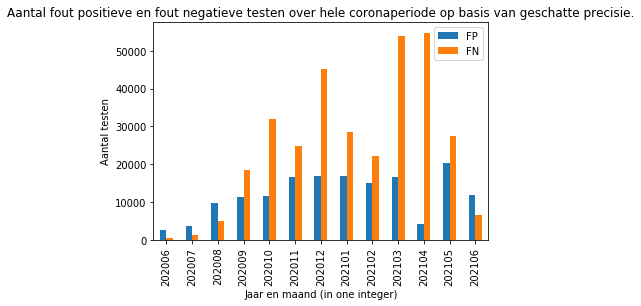

In [57]:
uitgevoerde_testen = pd.read_csv(loadfile('uitgevoerde_testen'), sep=';')

def FPvsFN(uitgevoerde_testen,guessed_precision):
    ### BEGIN SOLUTION
    uitgevoerde_testen['Date_of_statistics'] = uitgevoerde_testen['Date_of_statistics'].str.replace('-','').str[:6].astype(int)
    months = uitgevoerde_testen.groupby(['Date_of_statistics'])[['Tested_with_result','Tested_positive']].sum()
    months['Tested_negative'] = months['Tested_with_result']-months['Tested_positive']
    testen = pd.merge(months,guessed_precision, left_index=True,right_index=True)
    testen['TP'] = testen['Tested_positive']*testen['PVW_kans']
    testen['FP'] = testen['Tested_positive']-testen['TP']
    testen['TN'] = testen['Tested_negative']*testen['NVW_kans']
    testen['FN'] = testen['Tested_negative']-testen['TN']
    testen = testen[['Tested_with_result','Tested_positive','Tested_negative','TP', 'FP', 'TN', 'FN']]
    ### END SOLUTION
    return testen

valse_testen = FPvsFN(uitgevoerde_testen,guessed_precision)
valse_testen[['FP','FN']].astype(int).plot(kind='bar',ylabel='Aantal testen',xlabel='Jaar en maand (in one integer)',title='Aantal fout positieve en fout negatieve testen over hele coronaperiode op basis van geschatte precisie.')

In [58]:
### TESTEN VOOR STUDENTEN
assert isinstance(valse_testen,pd.DataFrame)
assert isinstance(valse_testen['TP'].loc[202006],float)
assert list(valse_testen.columns) == list(['Tested_with_result','Tested_positive','Tested_negative','TP', 'FP', 'TN', 'FN'])
def netjesoptellen(valse_testen):
    tests = valse_testen.copy()
    tests['TP+FN'] = tests['TP']+tests['FN'] 
    tests['FP+TN'] = tests['FP']+tests['TN']
    tests['FP+TN+TP+FN'] = tests['TP+FN'] + tests['FP+TN'] 
    tellen_netjes_op = tests['FP+TN+TP+FN'].corr(valse_testen['Tested_with_result']) 
    return assert_almost_equal(tellen_netjes_op,1)
    
netjesoptellen(valse_testen)

In [59]:
### BEGIN HIDDEN TESTS
uitgevoerde_testen = pd.read_csv(loadfile('uitgevoerde_testen'), sep=';')

def MYFPvsFN(uitgevoerde_testen,MYguessed_precision):
    uitgevoerde_testen['Date_of_statistics'] = uitgevoerde_testen['Date_of_statistics'].str.replace('-','').str[:6].astype(int)
    months = uitgevoerde_testen.groupby(['Date_of_statistics'])[['Tested_with_result','Tested_positive']].sum()
    months['Tested_negative'] = months['Tested_with_result']-months['Tested_positive']
    testen = pd.merge(months,MYguessed_precision, left_index=True,right_index=True)
    testen['TP'] = testen['Tested_positive']*testen['PVW_kans']
    testen['FP'] = testen['Tested_positive']-testen['TP']
    testen['TN'] = testen['Tested_negative']*testen['NVW_kans']
    testen['FN'] = testen['Tested_negative']-testen['TN']
    testen = testen[['Tested_with_result','Tested_positive','Tested_negative','TP', 'FP', 'TN', 'FN']]
    return testen
MYvalse_testen = MYFPvsFN(uitgevoerde_testen,MYguessed_precision)
pd.testing.assert_frame_equal(valse_testen,MYvalse_testen)
### END HIDDEN TESTS

## Sensitiviteit en specificiteit <a class='anchor' id='sensitiviteit'></a>
### pd: Vraag 3 <a class='anchor' id='pd3'></a>
Onderzoek in samenwerking met het RIVM: 

<i> Bos, M. De interpretatie van een testuitslag bij COVID-19. Huisarts Wet 64, 48–50 (2021). https://doi-org.vu-nl.idm.oclc.org/10.1007/s12445-021-1104-4 </i>. 

- In dit onderzoek wordt voorzichtig aangehaald dat een PCR test een <b>sensitiviteit</b> heeft van ongeveer <b>88%</b> (recall), ofwel de waarschijnlijkheid dat de PCR-test positief is als de geteste persoon COVID-19 heeft.
\begin{equation}
Sensitivity = \frac{T P}{T P + F N}
\end{equation}


- Ook wordt genoemd dat een PCR test een <b>specificiteit</b> heeft van ongeveer <b>99,5%</b>, ofwel de waarschijnlijkheid dat de PCR-test negatief is als de geteste persoon geen COVID-19 heeft.
\begin{equation}
Specificity = \frac{T N}{T N + F P}
\end{equation}

> Test met deze gegevens het model uit de vorige vraag:

    A: Geef het verschil tussen de gemiddelde sensititviteit berekend met de waardes ontstaan uit het model en de sensitiviteit uit het onderzoek.

    B: Geef het verschil tussen de gemiddelde specificiteit berekend met de waardes ontstaan uit het model en de specificiteit uit het onderzoek. 

    C: Geef op basis van enkel het PVW model (gebruik hiervoor dus de waardes van sensitiviteit en specificiteit uit onderzoek) de correlatie tussen het verkregen aantal negatief getesten personen uit het model en het gegeven aantal negatief geteste personen van het RIVM.

    D: Geef op basis van enkel het NVW model (gebruik hiervoor dus de waardes van sensitiviteit en specificiteit uit onderzoek) de correlatie tussen het verkregen aantal positief getesten personen uit het model en het gegeven aantal positief geteste personen van het RIVM.

Return floats tussen 0 en 1 in de variabelen: A, B, C en D.

In [61]:
### BEGIN SOLUTION

uitgevoerde_testen = pd.read_csv(loadfile('uitgevoerde_testen'), sep=';')
testen = FPvsFN(uitgevoerde_testen,guessed_precision)

## gebruikt gehele model
testen['Sensitivity'] = testen['TP']/(testen['TP']+testen['FN']) # to check model
testen['Specificity'] = testen['TN']/(testen['TN']+testen['FP']) # to check model

A = abs(testen['Sensitivity'].mean()-0.88)
B = abs(testen['Specificity'].mean()-0.995)

## gebruikt alleen PVW uit model
testen['FN_with_sensitivity_on_PVW'] = (testen['TP']/0.88)-testen['TP'] # in order to check with Tested_negative
testen['TN_with_specificity_on_PVW'] = (testen['FP']/0.995)/(1-0.995) # in order to check with Tested_negative
testen['FN+TN_with_sensspec_on_PVW'] = testen['FN_with_sensitivity_on_PVW']+testen['TN_with_specificity_on_PVW'] # to check with Tested_negative

C = testen['Tested_negative'].corr(testen['FN+TN_with_sensspec_on_PVW'])

## gebruikt alleen NVW uit model
testen['FP_with_sensitivity_on_NVW'] = (testen['TN']/0.88)-testen['TN'] # in order to check with Tested_positive
testen['TP_with_specificity_on_NVW'] = (testen['FN']/0.995)/(1-0.995) # in order to check with Tested_positive
testen['FP+TP_with_sensspec_on_NVW'] = testen['FP_with_sensitivity_on_NVW']+testen['TP_with_specificity_on_NVW'] # to check with Tested_positive

D = testen['Tested_positive'].corr(testen['FP+TP_with_sensspec_on_NVW'])
### END SOLTUTION
print(A,B,C,D)

0.17345273736550737 0.008983230612582771 0.3951877779662031 0.9202009110255008


In [62]:
### TESTEN VOOR STUDENT
for x in [A,B,C,D]:
    assert isinstance(x,float)
    assert (x<1 and x>0)

In [63]:
### BEGIN HIDDEN TESTS

uitgevoerde_testen = pd.read_csv(loadfile('uitgevoerde_testen'), sep=';')
MYtesten = MYFPvsFN(uitgevoerde_testen,MYguessed_precision)

## gebruikt gehele model
MYtesten['Sensitivity'] = MYtesten['TP']/(MYtesten['TP']+MYtesten['FN']) # to check model
MYtesten['Specificity'] = MYtesten['TN']/(MYtesten['TN']+MYtesten['FP']) # to check model

MYA = abs(MYtesten['Sensitivity'].mean()-0.88)
MYB = abs(MYtesten['Specificity'].mean()-0.995)

assert_almost_equal(A,MYA)
assert_almost_equal(B,MYB)

### END HIDDEN TESTS

In [64]:
### BEGIN HIDDEN TESTS

## gebruikt alleen PVW uit model
MYtesten['FN_with_sensitivity_on_PVW'] = (MYtesten['TP']/0.88)-MYtesten['TP'] # in order to check with Tested_negative
MYtesten['TN_with_specificity_on_PVW'] = (MYtesten['FP']/0.995)/(1-0.995) # in order to check with Tested_negative
MYtesten['FN+TN_with_sensspec_on_PVW'] = MYtesten['FN_with_sensitivity_on_PVW']+MYtesten['TN_with_specificity_on_PVW'] # to check with Tested_negative

MYC = MYtesten['Tested_negative'].corr(MYtesten['FN+TN_with_sensspec_on_PVW'])
assert_almost_equal(C,MYC)
### END HIDDEN TESTS

In [65]:
### BEGIN HIDDEN TESTS

## gebruikt alleen NVW uit model
MYtesten['FP_with_sensitivity_on_NVW'] = (MYtesten['TN']/0.88)-MYtesten['TN'] # in order to check with Tested_positive
MYtesten['TP_with_specificity_on_NVW'] = (MYtesten['FN']/0.995)/(1-0.995) # in order to check with Tested_positive
MYtesten['FP+TP_with_sensspec_on_NVW'] = MYtesten['FP_with_sensitivity_on_NVW']+MYtesten['TP_with_specificity_on_NVW'] # to check with Tested_positive

MYD = MYtesten['Tested_positive'].corr(MYtesten['FP+TP_with_sensspec_on_NVW'])
assert_almost_equal(D,MYD)

### END HIDDEN TESTS

## Bemonstering voorbereiding <a class='anchor' id='bem'></a>
### pd: Vraag 4 <a class='anchor' id='pd4'></a>
Return een Series met de precisie per dag in de functie calculate_precisions(prevalentie). Bereken dit op basis van de functie prevelance_on_precision(prevalentie, 'Dag'). (De precisiewaarden in de PVW_kans kolom uit vraag 1 hoeven niet te kloppen om het goed te hebben.) 

Return ook een Dataframe met het aantal positieve testen per beveiligingsregio (in kolom) per dag (in index) met de functie calculate_positives(uitgevoerde_testen).

Maak ze klaar om ze in de volgende vraag samen te voegen en zorg dat de index waardes in pd.datetime staan.

In [66]:
def calculate_precisions(prevalentie):
    ### BEGIN SOLUTION
    geschatte_prec_per_dag = prevelance_on_precision(prevalentie, 'Dag')['PVW_kans']
    geschatte_prec_per_dag.index = pd.to_datetime(geschatte_prec_per_dag.index.astype(str))
    ### END SOLUTION
    return geschatte_prec_per_dag
precisions = calculate_precisions(prevalentie)

uitgevoerde_testen = pd.read_csv(loadfile('uitgevoerde_testen'), sep=';')
def calculate_positives(uitgevoerde_testen):
    ### BEGIN SOLUTION
    Pos_per_regio = pd.pivot_table(uitgevoerde_testen,index='Date_of_statistics',columns='Security_region_name',values='Tested_positive',aggfunc='sum')
    Pos_per_regio.index = pd.to_datetime(Pos_per_regio.index)
    ### END SOLUTION
    return Pos_per_regio
positives = calculate_positives(uitgevoerde_testen)


In [67]:
### TESTEN VOOR STUDENTEN
assert isinstance(calculate_precisions(prevalentie), pd.Series)
assert isinstance(calculate_positives(uitgevoerde_testen), pd.DataFrame)
assert isinstance(calculate_precisions(prevalentie).index[0], pd.datetime)
assert isinstance(calculate_positives(uitgevoerde_testen).index[0], pd.datetime)
assert positives.columns.size == 26

C:\Users\jonas\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.
C:\Users\jonas\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


In [68]:
### BEGIN HIDDEN TESTS
def MYcalculate_precisions(prevalentie):
    ### BEGIN SOLUTION
    geschatte_prec_per_dag = MYprevelance_on_precision(prevalentie, 'Dag')['PVW_kans']
    geschatte_prec_per_dag.index = pd.to_datetime(geschatte_prec_per_dag.index.astype(str))
    ### END SOLUTION
    return geschatte_prec_per_dag
MYprecisions = MYcalculate_precisions(prevalentie)

def MYmaybe_calculate_precisions(prevalentie):
    ### BEGIN SOLUTION
    geschatte_prec_per_dag = prevelance_on_precision(prevalentie, 'Dag')['PVW_kans']
    geschatte_prec_per_dag.index = pd.to_datetime(geschatte_prec_per_dag.index.astype(str))
    ### END SOLUTION
    return geschatte_prec_per_dag
MYmaybe_precisions = MYmaybe_calculate_precisions(prevalentie)

uitgevoerde_testen = pd.read_csv(loadfile('uitgevoerde_testen'), sep=';')
def MYcalculate_positives(uitgevoerde_testen):
    ### BEGIN SOLUTION
    Pos_per_regio = pd.pivot_table(uitgevoerde_testen,index='Date_of_statistics',columns='Security_region_name',values='Tested_positive',aggfunc='sum')
    Pos_per_regio.index = pd.to_datetime(Pos_per_regio.index)
    ### END SOLUTION
    return Pos_per_regio
MYpositives = MYcalculate_positives(uitgevoerde_testen)

assert pd.DataFrame.equals(MYmaybe_precisions,calculate_precisions(prevalentie)) or pd.DataFrame.equals(MYprecisions,calculate_precisions(prevalentie)) 

pd.testing.assert_frame_equal(MYpositives,calculate_positives(uitgevoerde_testen))

### END HIDDEN TESTS

## Effecten bemonstering <a class='anchor' id='bemonstering'></a>

### pd: Vraag 5 <a class='anchor' id='pd5'></a>
Uit het onderzoek, [Frazee, B. W., de la Guardia, A. R. H., Alter, H., Chen, C. G., Fuentes, E. L., Holzer, A. K., ... & Dekker, C. L. (2018). Accuracy and discomfort of different types of intranasal specimen collection methods for molecular influenza testing in emergency department patients. Annals of emergency medicine, 71(4), 509-517.](https://www.sciencedirect.com/science/article/abs/pii/S0196064417316591?casa_token=ByVSxoDjtKgAAAAA:GRKCvgLxVevhX5WjyHPG0cdObnHYw1Qa9FbmpCvIrXRaFZU5xxyZQxbhW2aBS0EXPKwhpR5kJQY), blijkt dat de volgende waardes gelden voor een influenza-achtige ziekte vegeleken met NPS als referentie standaard:

<img src="https://i.imgur.com/uGCWNZq.jpg" width="300" height="200" />

- Voor het midturbinale uitstrijkje (MTS): een sensitiviteit van 98%, en een specificiteit van 98.5%. 
- Voor het neuswat uitstrijkje (NS): een sensitiviteit van 84.4%, en een specificiteit van 99.1%.

Maak een DatFrame met hoeveel minder geïnfecteerden per regio een positieve COVID-uitslag zouden hebben als bij elke PCR-test van het RIVM het wattenstaafje niet in de diepe nasopharynx neuswat (NPS), maar in de midturbinale neuswat (MTS) of in de neuswat (MS) wordt afgenomen. Maak hier twee kolommen voor genaamd MTS en NS. Bereken dit op basis van de twee gemaakte dataframes uit de vraag 4 (de precisiewaarden uit vraag 1 hoeven niet te kloppen). Ga uit dat het RIVM altijd een bemonstering doet in de NPS en neem de onderzoeksgegevens van vraag 3 mee voor de berekening. Jouw functie moet werken voor zowel het verschil tussen NPS en MTS én het verschil tussen NPS en NS door deze afkortingen als strings mee te geven in de functie. Sorteer per gemeente het aantal minder vals positieve gevallen van groot naar klein.

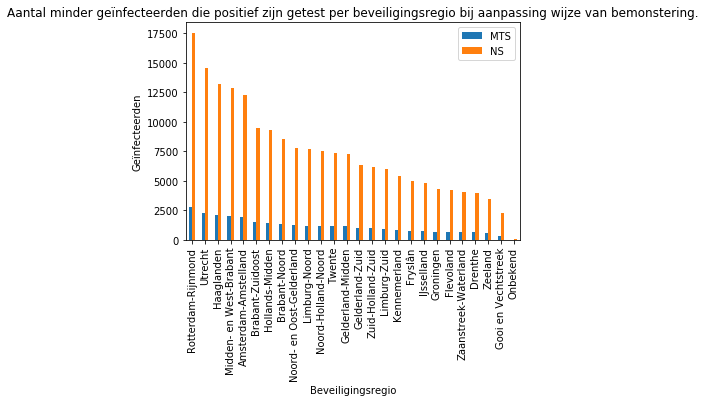

In [69]:
def minder_per_dag(precisions,positives,neuswat):
    ### BEGIN SOLUTION
    positives_precisions = pd.merge(precisions,positives,left_index=True,right_index=True,how='right')
    for col in positives_precisions.columns[1:]:
        TP = positives_precisions[col]*positives_precisions['PVW_kans']
        FN_NPS = (TP/(0.88))-TP 
        if neuswat == 'MTS':
            FN_MTS = (TP/(0.88*0.98))-TP # sensivity PCR-test (uit onderzoek van vraag 3) keer 0.98 MTS (NPS = 100%)
            positives_precisions[col] = FN_MTS - FN_NPS
        if neuswat == 'NS':
            FN_NS = (TP/(0.88*0.885))-TP # sensivity PCR-test (uit onderzoek van vraag 3) keer 0.885 NS (NPS = 100%)
            positives_precisions[col] = FN_NS - FN_NPS
        if neuswat != 'MTS' and neuswat != 'NS':
            return 'Geef MTS of NS als waarde mee.'
    output = positives_precisions.iloc[:,1:]
    ### END SOLUTION
    return output

def top_regions(precisions,positives,neuswat):
    ### BEGIN SOLUTION
    minder_gevallen_dag = minder_per_dag(precisions,positives, neuswat)
    minder_gevallen_regio = minder_gevallen_dag.sum(axis=0).sort_values(ascending=False).astype(int)
    ### END SOLUTION
    return minder_gevallen_regio.rename(neuswat)

minder_gespot_MTS = top_regions(precisions,positives,'MTS')
minder_gespot_NS = top_regions(precisions,positives,'NS')

MTS_en_NS = pd.merge(minder_gespot_MTS,minder_gespot_NS,left_index=True,right_index=True)
MTS_en_NS.plot(kind='bar',ylabel='Geïnfecteerden',xlabel='Beveiligingsregio',title='Aantal minder geïnfecteerden die positief zijn getest per beveiligingsregio bij aanpassing wijze van bemonstering.')

In [70]:
### TESTEN VOOR DE STUDENT
assert isinstance(MTS_en_NS,pd.DataFrame)
assert list(MTS_en_NS.columns)==['MTS', 'NS']
assert np.all(MTS_en_NS)>0
assert type(MTS_en_NS.iloc[0,0])==np.int32
assert type(MTS_en_NS.index[0])==str
assert 'Onbekend' in set(MTS_en_NS.index)

In [71]:
### BEGIN HIDDEN TESTS
def MYminder_per_dag(MYprecisions,MYpositives,neuswat):
    positives_precisions = pd.merge(MYprecisions,MYpositives,left_index=True,right_index=True,how='right')
    for col in positives_precisions.columns[1:]:
        TP = positives_precisions[col]*positives_precisions['PVW_kans']
        FN_NPS = (TP/(0.88))-TP 
        if neuswat == 'MTS':
            FN_MTS = (TP/(0.88*0.98))-TP # sensivity PCR-test (uit onderzoek van vraag 3) keer 0.98 MTS (NPS = 100%)
            positives_precisions[col] = FN_MTS - FN_NPS
        if neuswat == 'NS':
            FN_NS = (TP/(0.88*0.885))-TP # sensivity PCR-test (uit onderzoek van vraag 3) keer 0.885 NS (NPS = 100%)
            positives_precisions[col] = FN_NS - FN_NPS
        if neuswat != 'MTS' and neuswat != 'NS':
            return 'Geef MTS of NS als waarde mee.'
    output = positives_precisions.iloc[:,1:]
    return output

def MYtop_regions(MYprecisions,MYpositives, neuswat):
    minder_gevallen_dag = minder_per_dag(MYprecisions,MYpositives, neuswat)
    minder_gevallen_regio = minder_gevallen_dag.sum(axis=0).sort_values(ascending=False).astype(int)
    return minder_gevallen_regio.rename(neuswat)

MYminder_gespot_MTS = top_regions(MYprecisions,MYpositives,'MTS')
MYminder_gespot_NS = top_regions(MYprecisions,MYpositives,'NS')

MYmaybe_minder_gespot_MTS = top_regions(MYmaybe_precisions,MYpositives,'MTS')
MYmaybe_minder_gespot_NS = top_regions(MYmaybe_precisions,MYpositives,'NS')

MYMTS_en_NS = pd.merge(minder_gespot_MTS,minder_gespot_NS,left_index=True,right_index=True)
MYmaybe_MTS_en_NS = pd.merge(MYmaybe_minder_gespot_MTS,MYmaybe_minder_gespot_NS,left_index=True,right_index=True)

assert pd.DataFrame.equals(MYMTS_en_NS,MTS_en_NS) or pd.DataFrame.equals(MYmaybe_MTS_en_NS,MTS_en_NS)
### END HIDDEN TESTS

### pd Vraag 6: <a class='anchor' id='pd6'></a>
Hoeveel mensen zijn er in totaal per regio na 7 dagen besmet als alle mensen die een vals positieve test hadden (vanwege een MTS test) niet in quarentaine zijn gegaan na hun test? Reken dit eerst uit voor elke dag en elke regio, tel alles op het laatst pas op. 

Het doel is om te zien hoeveel gevallen er in de héle coronaperiode bij zijn gekomen in elke regio, doordat <b> elke dag </b> een aantal personen een nieuwe keten van besmettingen (cluster) hebben opgestart die na 7 dagen (plotseling) ophield. (Ervan uitgaande dat degene die zij hebben aangestoken allemaal gingen testen, wel een True Positive hadden, en in volledige isolatie doken of dan wel naar het ziekenhuis gingen.)

Reken eerst E en p uit in jouw functie contact_of_kans_besmetting(gedrag,indicatorcategorie) voor elke dag en elke regio. Tip: Roep minder_per_dag() in jouw functie op om de juiste index waardes te krijgen:

- E: Kijk voor het gemiddeld aantal personen er regio waarmee de respondent in contact komt, in hoeverre deze alle maatregelen heeft naleefd volgens het gedragsonderzoek van het RIVM. Neem aan dat alle maatregelen precies even veel invloed uitoefenen om in contact te komen met personen. Ga standaard uit van een minimum voor de eerste dag: gemiddeld huishouden van 2.1 personen (voor de eerste dag). Als alle regels strict worden nageleefd ziet de patiënt maximaal 3 personen buiten het huishouden per dag. Ga ervan uit dat als alle regels strict worden nageleefd, een persoon 100% zou scoren op het onderzoek. En als een persoon de helft zo scoren, deze in contact komt met het dubbele van het maximum. Zorg dat steeds het laatst gerapporteerde onderzoek geldt voor de desbetreffende dag.

- p: Kijk voor de kans op besmetting naar hoeveel procent van de respondenten per regio minstens één corona gerelateerde klacht had per dag. Zorg dat steeds het laatst gerapporteerde onderzoek geldt voor de desbetreffende dag.

Pak vervolgens het aantal besmettingen op een dag uit minder_per_dag() en pas hier onderstaande functie op toe met de gemaakte dataframe contact en kans_op_besmetting. 

Maak eerst een dataframe met als waardes het aantal mensen dat over de periode van de 7 opvolgende dagen wordt besmet van die dag en regio. Return vervolgens een Series met het totaal besmettingen per regio als int waardes.

<img src=https://i.imgur.com/coCv64n.jpg width=300 hight=200> [Bron foto](https://multimedia.tijd.be/coronaroute/).

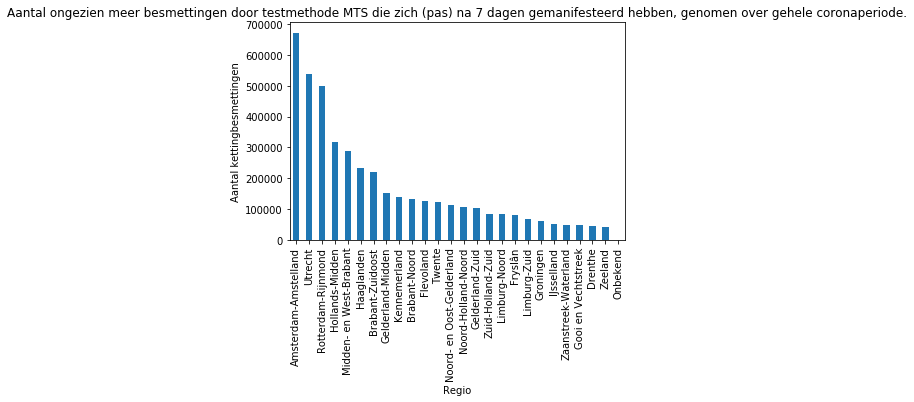

In [72]:
gedrag = pd.read_csv(loadfile('gedrag'),delimiter=';').rename(columns={'Date_of_measurement':'Date'})

def contact_of_kans_besmetting(gedrag,indicatorcategorie):
    if indicatorcategorie != 'Naleving' and indicatorcategorie != 'Klachten':
        return 'Please fill in Naleving or Klachten'
    nieuwe_gevallen = minder_per_dag(precisions,positives,'MTS')
    indexen = nieuwe_gevallen.index

    naleving_alle = gedrag[(gedrag['Indicator_category']==indicatorcategorie)&(gedrag['Region_name']!='Nederland')]
    kans_op_besmetting = pd.pivot_table(naleving_alle,index='Date',columns='Region_name',values='Value')
    kans_op_besmetting.index = pd.to_datetime(kans_op_besmetting.index)
    
    for idx in indexen:
        if idx not in kans_op_besmetting.index:
            kans_op_besmetting.loc[idx,:]=np.nan
    kans = (kans_op_besmetting.sort_index().fillna(method='ffill')/100)
    return kans


def keting_besmetting(gedrag,methode,evoluties):
    nieuwe_gevallen = minder_per_dag(precisions,positives,methode)
    kans_besmetting = contact_of_kans_besmetting(gedrag,'Klachten')   
    for i in range(0,evoluties+1):
        if i==0:
            contact = (1/contact_of_kans_besmetting(gedrag,'Naleving'))*5.1
        else:
            contact = (1/contact_of_kans_besmetting(gedrag,'Naleving'))*3
        old = nieuwe_gevallen
        evolutie = contact*kans_besmetting*nieuwe_gevallen  
        if i != 0:
            nieuwe_gevallen = evolutie+old
        else:
            nieuwe_gevallen = evolutie
    totaal = nieuwe_gevallen.sum(axis=0).astype(int)
    return totaal

totaal = keting_besmetting(gedrag,'MTS',7)
totaal.sort_values(ascending=False).plot(kind='bar',xlabel='Regio',ylabel='Aantal kettingbesmettingen',title='Aantal ongezien meer besmettingen door testmethode MTS die zich (pas) na 7 dagen gemanifesteerd hebben, genomen over gehele coronaperiode.')

In [73]:
### TESTEN VOOR DE STUDENT
assert isinstance(totaal,pd.Series)
assert isinstance(totaal[0],np.int32)
assert isinstance(totaal.index[0],str)
assert contact_of_kans_besmetting(gedrag,'Naleving').shape == (385,25)
assert (set(minder_per_dag(precisions,positives,'MTS').columns) - set(contact_of_kans_besmetting(gedrag,'Naleving').columns))=={'Onbekend'}
assert set(minder_per_dag(precisions,positives,'MTS').index) == set(contact_of_kans_besmetting(gedrag,'Naleving').index)


In [74]:
### BEGIN HIDDEN TESTS

gedrag = pd.read_csv(loadfile('gedrag'),delimiter=';').rename(columns={'Date_of_measurement':'Date'})

def MYcontact_of_kans_besmetting(gedrag,indicatorcategorie):
    if indicatorcategorie != 'Naleving' and indicatorcategorie != 'Klachten':
        return 'Please fill in Naleving or Klachten'
    nieuwe_gevallen = minder_per_dag(MYprecisions,MYpositives,'MTS')
    indexen = nieuwe_gevallen.index

    naleving_alle = gedrag[(gedrag['Indicator_category']==indicatorcategorie)&(gedrag['Region_name']!='Nederland')]
    kans_op_besmetting = pd.pivot_table(naleving_alle,index='Date',columns='Region_name',values='Value')
    kans_op_besmetting.index = pd.to_datetime(kans_op_besmetting.index)
    # voegt indexen uit andere tabel toe
    for idx in indexen:
        if idx not in kans_op_besmetting.index:
            kans_op_besmetting.loc[idx,:]=np.nan
    kans = (kans_op_besmetting.sort_index().fillna(method='ffill')/100)
    return kans


def MYketing_besmetting(gedrag,methode,evoluties):
    nieuwe_gevallen = minder_per_dag(MYprecisions,MYpositives,methode) ## neemt deze waardes ook mee
    kans_besmetting = MYcontact_of_kans_besmetting(gedrag,'Klachten')   
    for i in range(0,evoluties+1):
        if i==0:
            contact = (1/contact_of_kans_besmetting(gedrag,'Naleving'))*5.1
        else:
            contact = (1/contact_of_kans_besmetting(gedrag,'Naleving'))*3
        old = nieuwe_gevallen
        evolutie = contact*kans_besmetting*nieuwe_gevallen  
        if i != 0:
            nieuwe_gevallen = evolutie+old
        else:
            nieuwe_gevallen = evolutie
    totaal = nieuwe_gevallen.sum(axis=0).astype(int)
    return totaal

def MYmaybe_keting_besmetting(gedrag,methode,evoluties):
    nieuwe_gevallen = minder_per_dag(MYmaybe_precisions,MYpositives,methode) ## neemt deze waardes ook mee
    kans_besmetting = MYcontact_of_kans_besmetting(gedrag,'Klachten')
    for i in range(0,evoluties+1):
        if i==0:
            contact = (1/MYcontact_of_kans_besmetting(gedrag,'Naleving'))*5.1
        else:
            contact = (1/MYcontact_of_kans_besmetting(gedrag,'Naleving'))*3
        old = nieuwe_gevallen
        evolutie = contact*kans_besmetting*nieuwe_gevallen  
        if i != 0:
            nieuwe_gevallen = evolutie+old
        else:
            nieuwe_gevallen = evolutie
    totaal = nieuwe_gevallen.sum(axis=0).astype(int)
    return totaal


pd.testing.assert_frame_equal(contact_of_kans_besmetting(gedrag,'Naleving'),MYcontact_of_kans_besmetting(gedrag,'Naleving'),check_names=False,check_dtype=False)
pd.testing.assert_frame_equal(contact_of_kans_besmetting(gedrag,'Klachten'),MYcontact_of_kans_besmetting(gedrag,'Klachten'),check_names=False,check_dtype=False)

### END HIDDEN TESTS

In [75]:
### BEGIN HIDDEN TESTS
MYtotaal = MYketing_besmetting(gedrag,'MTS',7)
MYmaybe_totaal = MYmaybe_keting_besmetting(gedrag,'MTS',7)

assert pd.DataFrame.equals(MYtotaal,totaal) or pd.DataFrame.equals(totaal,MYmaybe_totaal)
### END HIDDEN TESTS

## Gedragsonderzoek <a class='anchor' id='gedrag'></a>
### pd: Vraag 7 <a class='anchor' id='pd7'></a>
Maak een tabel waar per leeftijdsgroep te zien is hoeveel mensen in de IC liggen die meer dan het maximum aantal bezoekers hebben ontvangen volgens het representatieve onderzoek van het RIVM. Zorg dat je uit de dataset van 'IC-opnames per leeftijdsgroep' de leeftijdsgroepen omrekent overeenkomend naar de leeftijsgroepen uit de gedragsdataset d.m.v. mapping. Ga ervan uit dat de meting van het gedrag die in een bepaalde maand is afgenomen voor die hele maand geldt en neem het gemiddelde percentage als er meer dan twee metingen zijn gedaan in één maand. Zorg dat elke datum naar 'datetime' is omgezet.

C:\Users\jonas\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


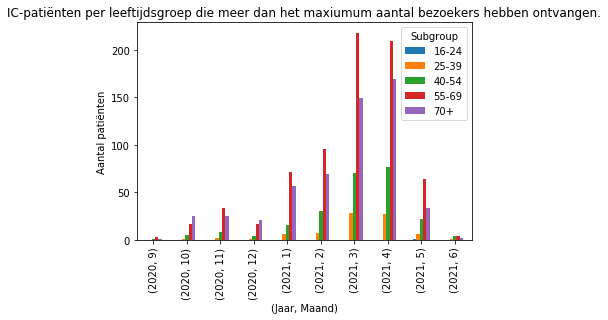

In [76]:
gedrag = pd.read_csv(loadfile('gedrag'),delimiter=';').rename(columns={'Date_of_measurement':'Date'})
ic_leeftijd = pd.read_csv(loadfile('COVID-19_ziekenhuis_ic_opnames_per_leeftijdsgroep'),delimiter=';').rename(columns={'Date_of_statistics_week_start':'Date'})

def bereken_nalevers_op_ic(gedrag,ic_leeftijd):
    ### BEGIN SOLUTION
    naleving = gedrag[gedrag['Indicator_category']=='Naleving']
    gedragsonderzoek = naleving[naleving['Subgroup_category']=='Leeftijd']
    
    # map leeftijden uit ic_opnames naar leeftijden uit gedragsonderzoek
    ic_opnames = ic_leeftijd[ic_leeftijd['Age_group'] != 'Unknown'] 
    mapping = map_age_groups(gedrag,ic_opnames) 
    ic_opnames['Age_group'] = ic_opnames['Age_group'].map(mapping)
    
    mensen_op_ic = ic_opnames.groupby(['Date','Age_group'])['IC_admission'].sum().unstack()
    mensen_op_ic.index = pd.to_datetime(mensen_op_ic.index)
    mensen_op_ic = mensen_op_ic.groupby(by=[mensen_op_ic.index.year,mensen_op_ic.index.month]).sum()

    ontvangt_max_bezoekers_thuis = gedragsonderzoek[gedragsonderzoek['Indicator']=='Ontvang_max_bezoekers_thuis']
    max_bezoekers_thuis= pd.pivot_table(ontvangt_max_bezoekers_thuis,index='Date',columns='Subgroup',values='Value',aggfunc='mean')
    max_bezoekers_thuis.index = pd.to_datetime(max_bezoekers_thuis.index)
    bezoekers_naleving = max_bezoekers_thuis.groupby(by=[max_bezoekers_thuis.index.year,max_bezoekers_thuis.index.month]).mean()
    mensen_op_ic_nageleeft = (((100-bezoekers_naleving)/100)*mensen_op_ic).dropna()
    ### END SOLUTION
    return mensen_op_ic_nageleeft.dropna()

def map_age_groups(gedrag,ic_leeftijd):
        ### BEGIN SOLUTION
        mapping = dict()
        age_groups = list(set(gedrag[gedrag['Subgroup_category']=='Leeftijd']['Subgroup']))
        age_groups_ic = list(set(ic_leeftijd['Age_group']))
        for x in age_groups:
            interval = x.replace('+','-99').split('-')
            down = interval[0]
            up = interval[1]
            for y in age_groups_ic:
                stuk = y.replace('+','-99').split('-')
                stuk_down = stuk[0]
                stuk_up = stuk[1]
                if stuk_down >= down and stuk_up <= up:
                    mapping[y] = x
        ### END SOLUTION
        return mapping
    
nalevers = bereken_nalevers_op_ic(gedrag,ic_leeftijd)
nalevers.astype(int).plot(kind='bar',xlabel='(Jaar, Maand)',ylabel='Aantal patiënten',
              title='IC-patiënten per leeftijdsgroep die meer dan het maxiumum aantal bezoekers hebben ontvangen.')

In [77]:
### TESTEN VOOR STUDENT
assert isinstance(nalevers,pd.DataFrame)
assert set(nalevers.columns) == set(['16-24', '25-39', '40-54', '55-69', '70+'])
assert type(nalevers.index)==pd.MultiIndex

In [78]:
gedrag = pd.read_csv(loadfile('gedrag'),delimiter=';').rename(columns={'Date_of_measurement':'Date'})
ic_leeftijd = pd.read_csv(loadfile('COVID-19_ziekenhuis_ic_opnames_per_leeftijdsgroep'),delimiter=';').rename(columns={'Date_of_statistics_week_start':'Date'})

### BEGIN HIDDEN TESTS
def MYbereken_nalevers_op_ic(gedrag,ic_leeftijd):
    naleving = gedrag[gedrag['Indicator_category']=='Naleving']
    gedragsonderzoek = naleving[naleving['Subgroup_category']=='Leeftijd']
    
    # map leeftijden uit ic_opnames naar leeftijden uit gedragsonderzoek
    ic_opnames = ic_leeftijd[ic_leeftijd['Age_group'] != 'Unknown'] 
    mapping = MYmap_age_groups(gedrag,ic_opnames) 
    ic_opnames.loc[:,'Age_group']= ic_opnames.loc[:,'Age_group'].map(mapping)
    mensen_op_ic = ic_opnames.groupby(['Date','Age_group'])['IC_admission'].sum().unstack()
    mensen_op_ic.index = pd.to_datetime(mensen_op_ic.index)
    mensen_op_ic = mensen_op_ic.groupby(by=[mensen_op_ic.index.year,mensen_op_ic.index.month]).sum()

    ontvangt_max_bezoekers_thuis = gedragsonderzoek[gedragsonderzoek['Indicator']=='Ontvang_max_bezoekers_thuis']
    max_bezoekers_thuis= pd.pivot_table(ontvangt_max_bezoekers_thuis,index='Date',columns='Subgroup',values='Value',aggfunc='mean')
    max_bezoekers_thuis.index = pd.to_datetime(max_bezoekers_thuis.index)
    bezoekers_naleving = max_bezoekers_thuis.groupby(by=[max_bezoekers_thuis.index.year,max_bezoekers_thuis.index.month]).mean()
    mensen_op_ic_nageleeft = (((100-bezoekers_naleving)/100)*mensen_op_ic).dropna()
    return mensen_op_ic_nageleeft.dropna()

def MYmap_age_groups(gedrag,ic_leeftijd):
        mapping = dict()
        age_groups = list(set(gedrag[gedrag['Subgroup_category']=='Leeftijd']['Subgroup']))
        age_groups_ic = list(set(ic_leeftijd['Age_group']))
        for x in age_groups:
            interval = x.replace('+','-99').split('-')
            down = interval[0]
            up = interval[1]
            for y in age_groups_ic:
                stuk = y.replace('+','-99').split('-')
                stuk_down = stuk[0]
                stuk_up = stuk[1]
                if stuk_down >= down and stuk_up <= up:
                    mapping[y] = x
        return mapping
    
MYnalevers = MYbereken_nalevers_op_ic(gedrag,ic_leeftijd)

pd.testing.assert_frame_equal(nalevers,MYnalevers,check_dtype=False)

C:\Users\jonas\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


## Teststraat <a class='anchor' id='teststraat'></a>
### pd Vraag 8: <a class='anchor' id='pd8'></a>
Er komt veel bij kijken bij het opzetten van een teststraat. Zo is niet ieder pand hier geschikt voor. [Het opzetten kan zelfs 8 weken duren in sommige gevallen.](https://ggdghor.nl/actueel-bericht/er-komt-veel-kijken-bij-het-opzetten-van-een-teststraat/)

Geef per beveiligingsregio het aantal dagen voordat zij erin slagen om meer dan de helft van hun testen af te nemen die zij in n weken tijd gaan afnemen. Return een series met de namen van de regio's en het aantal dagen geordend van klein naar groot.

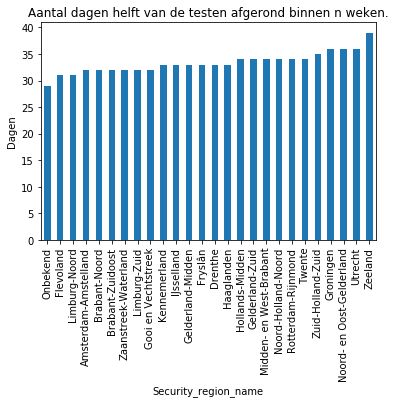

In [79]:
uitgevoerde_testen = pd.read_csv(loadfile('uitgevoerde_testen'), sep=';')
def snelle_opzetters(uitgevoerde_testen,n):
    ### BEGIN SOLUTION
    uitgevoerde_testen['Date_statistics'] = uitgevoerde_testen['Date_of_statistics'].str.replace('-','').astype(int)
    regions = pd.pivot_table(uitgevoerde_testen,index=['Security_region_name'],columns=['Date_of_statistics'],values=['Tested_with_result','Tested_positive'],aggfunc='sum')
    testen_hele_periode = regions['Tested_with_result'].T
    testen_hele_periode.index = pd.to_datetime(testen_hele_periode.index)
    first_ten_weeks = testen_hele_periode[:7*n] #8 weken
    voltooide_testen_percentage=(first_ten_weeks.cumsum(axis=0)/first_ten_weeks.sum(axis=0))*100
    # aantal dagen dat het niet lukt plus 1
    aantal_dagen_geslaagd = voltooide_testen_percentage[voltooide_testen_percentage>50].isnull().sum(axis=0)+1
    snelle_regions = aantal_dagen_geslaagd.sort_values(ascending=True)
    ### END SOLUTION
    return snelle_regions

snelle_regions = snelle_opzetters(uitgevoerde_testen,8)
snelle_regions.plot(kind='bar',ylabel='Dagen',title='Aantal dagen helft van de testen afgerond binnen n weken.')

In [80]:
### TESTEN VOOR DE STUDENT
assert isinstance(snelle_regions,pd.Series)
assert (snelle_regions.size==26)
assert type(snelle_regions.index[0])==str

In [81]:
### BEGIN HIDDEN TESTS
MYuitgevoerde_testen = pd.read_csv(loadfile('uitgevoerde_testen'), sep=';')
def MYsnelle_opzetters(MYuitgevoerde_testen,n):
    ### BEGIN SOLUTION
    uitgevoerde_testen['Date_statistics'] = MYuitgevoerde_testen['Date_of_statistics'].str.replace('-','').astype(int)
    regions = pd.pivot_table(uitgevoerde_testen,index=['Security_region_name'],columns=['Date_of_statistics'],values=['Tested_with_result','Tested_positive'],aggfunc='sum')
    testen_hele_periode = regions['Tested_with_result'].T
    testen_hele_periode.index = pd.to_datetime(testen_hele_periode.index)
    first_ten_weeks = testen_hele_periode[:7*n] #8 weken
    voltooide_testen_percentage=(first_ten_weeks.cumsum(axis=0)/first_ten_weeks.sum(axis=0))*100
    # aantal dagen dat het niet lukt plus 1
    aantal_dagen_geslaagd = voltooide_testen_percentage[voltooide_testen_percentage>50].isnull().sum(axis=0)+1
    snelle_regions = aantal_dagen_geslaagd.sort_values(ascending=True)
    ### END SOLUTION
    return snelle_regions

MYsnelle_regions = MYsnelle_opzetters(MYuitgevoerde_testen,8)
pd.testing.assert_series_equal(snelle_regions,MYsnelle_regions,check_names=False,check_dtype=False)
### END HIDDEN TESTS

## Gedragsonderzoek <a class='anchor' id='gedrag2'></a>
### pd Vraag 9: <a class='anchor' id='pd9'></a>
Maak voor de n jongste en de n oudste leeftijdsgroepen een dataframe waar het percentage aantal ziekenhuisopnames relatief te zien is over het totale aantal ziekenhuisopnames van die leeftijdsgroep. Zorg dat je in de rijen het aantal weken in 2021 hebt (start vaccinatie) van het laatste rapport minus de laatste 5 weken, omdat dan alleen verwerkte data wordt meegenomen. Haal de leeftijdsgroep 'Unknown' eruit, maar zorg dat je verder geen string waardes intikt om tot de juiste leeftijdsgroepen te komen bij het filteren. Doe dit ook zonder pd.merge(). Jouw functie pak_leeftijdsgroepen(percentage_leeftijd) zou ook op een ander dataframe moeten werken om daar de eerste drie en laatste drie kolommen uit te pakken.

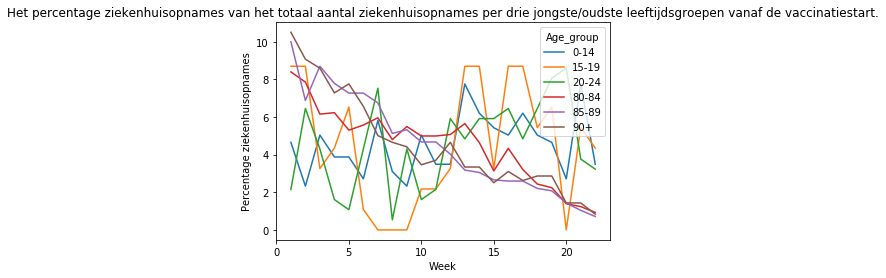

In [82]:
ic_leeftijd = pd.read_csv(loadfile('COVID-19_ziekenhuis_ic_opnames_per_leeftijdsgroep'),delimiter=';').rename(columns={'Date_of_statistics_week_start':'Date'})

def ziekehuis_leeftijd_relatief(ic_leeftijd,groups):
    ### BEGIN SOLUTION
    ic_leeftijd = ic_leeftijd[ic_leeftijd['Age_group'] != 'Unknown']
    all_leeftijd = pd.pivot_table(ic_leeftijd,index='Date',columns='Age_group',values='Hospital_admission',aggfunc='sum')
    all_leeftijd.index = pd.to_datetime(all_leeftijd.index)
    vaccination_period = all_leeftijd.groupby(by=[all_leeftijd.index.isocalendar().year,all_leeftijd.index.isocalendar().week]).sum()
    sliced_weeks = vaccination_period.loc[[2021]].droplevel(0)[:-5]
    percentage_leeftijd = (100*sliced_weeks).divide(sliced_weeks.sum(axis=0))
    table = pak_leeftijdsgroepen(percentage_leeftijd,groups)
    ### BEGIN SOLUTION
    return table

def pak_leeftijdsgroepen(percentage_leeftijd,groups):
    ### BEGIN SOLUTION
    table = percentage_leeftijd.loc[:,~percentage_leeftijd.columns.isin(percentage_leeftijd.iloc[:,groups:-groups].columns)]
    ### END SOLUTION
    return table


leeftijdverdeling = ziekehuis_leeftijd_relatief(ic_leeftijd,3)
leeftijdverdeling.plot(xlabel='Week',ylabel='Percentage ziekenhuisopnames',title='Het percentage ziekenhuisopnames van het totaal aantal ziekenhuisopnames per drie jongste/oudste leeftijdsgroepen vanaf de vaccinatiestart.')

In [83]:
percentage_leeftijd = ziekehuis_leeftijd_relatief(ic_leeftijd,3)
colss = pak_leeftijdsgroepen(percentage_leeftijd.iloc[:,1:],3).columns
assert list(colss)==['15-19', '20-24', '80-84', '85-89', '90+']
assert isinstance(leeftijdverdeling, pd.DataFrame)

In [84]:
### BEGIN HIDDEN TESTS
ic_leeftijd = pd.read_csv(loadfile('COVID-19_ziekenhuis_ic_opnames_per_leeftijdsgroep'),delimiter=';').rename(columns={'Date_of_statistics_week_start':'Date'})

def MYziekehuis_leeftijd_relatief(ic_leeftijd,groups):
    ic_leeftijd = ic_leeftijd[ic_leeftijd['Age_group'] != 'Unknown']
    all_leeftijd = pd.pivot_table(ic_leeftijd,index='Date',columns='Age_group',values='Hospital_admission',aggfunc='sum')
    all_leeftijd.index = pd.to_datetime(all_leeftijd.index)
    vaccination_period = all_leeftijd.groupby(by=[all_leeftijd.index.isocalendar().year,all_leeftijd.index.isocalendar().week]).sum()
    sliced_weeks = vaccination_period.loc[[2021]].droplevel(0)[:-5]
    MYpercentage_leeftijd = (100*sliced_weeks).divide(sliced_weeks.sum(axis=0))
    MYleeftijdverdeling = MYpak_leeftijdsgroepen(MYpercentage_leeftijd,groups)
    return MYleeftijdverdeling

def MYpak_leeftijdsgroepen(MYpercentage_leeftijd,groups):
    ### BEGIN SOLUTION
    table = MYpercentage_leeftijd.loc[:,~MYpercentage_leeftijd.columns.isin(MYpercentage_leeftijd.iloc[:,groups:-groups].columns)]
    ### END SOLUTION
    return table

MYleeftijdverdeling = MYziekehuis_leeftijd_relatief(ic_leeftijd,3)
pd.testing.assert_frame_equal(leeftijdverdeling,MYleeftijdverdeling)


### END HIDDEN TESTS

In [85]:
### BEGIN HIDDEN TESTS
test_age_groups = pd.pivot_table(ic_leeftijd,index='Date',columns='Age_group',values='Hospital_admission',aggfunc='sum').iloc[:,2:-4]
MYcolss = pak_leeftijdsgroepen(test_age_groups,3)
assert_equal(list(MYcolss),['20-24', '25-29', '30-34', '65-69', '70-74', '75-79'])
### END HIDDEN TESTS

### pd Vraag 10: <a class='anchor' id='pd10'></a>
Maak één dataframe met per week het aantal procent mannen en vrouwen dat zich zorgen maakt uit het gedragsonderzoek van het RIVM. En maak één dataframe dat het totaal aantal overledenen per geslacht weergeeft per week. Voeg deze twee dataframes samen en zorg dat voor elke week steeds het laatste onderzoek geldt dat het RIVM heeft uitgevoerd. 

Tip: Maak gebruik van pd.to_datetime().

Return een dataframe met per week (beginnend bij week 0) het aantal overleden mannen dat zich wel zorgen heeft gemaakt over het virus in kolom <b>'Mannen_overleden_met_zorg'</b>, het aantal overleden vrouwen dat zich wel zorgen heeft gemaakt in kolom <b>'Vrouwen_overleden_met_zorg'</b>, het aantal overleden mannen dat zich geen zorgen heeft gemaakt in kolom <b>'Mannen_overleden_zonder_zorg'</b> en het aantal overleden vrouwen dat zich geen zorgen heeft gemaakt in kolom <b>'Vrouwen_overleden_zonder_zorg'</b>.

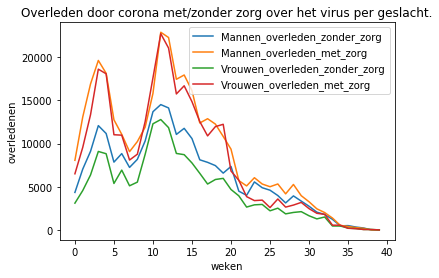

In [86]:
gedrag = pd.read_csv(loadfile('gedrag'),delimiter=';').rename(columns={'Date_of_measurement':'Date'})
def wekelijks_zorgmakenden(gedrag):
    ### BEGIN SOLUTION
    naleving = gedrag[(gedrag['Indicator_category']=='Zorgen')]
    opleiding = naleving[(naleving['Subgroup_category']=='Geslacht')&(naleving['Indicator']=='Zorgen_over_Coronavirus')]
    zorgen = pd.pivot_table(opleiding,index='Date',columns='Subgroup',values='Value',aggfunc='mean')
    zorgen.index = pd.to_datetime(zorgen.index)
    zorgen_per_week = zorgen.groupby([zorgen.index.isocalendar().year, zorgen.index.isocalendar().week]).mean()
    zorgen_per_week.index = pd.Index(zorgen_per_week.index)
    ### END SOLUTION
    return zorgen_per_week

zorgen_per_week = wekelijks_zorgmakenden(gedrag)

casus = pd.read_csv(loadfile('casus'), sep=';')
def wekelijks_overledenen(casus):
    ### BEGIN SOLUTION
    casus = casus[casus['Deceased'] != 'Unknown']
    casus = casus[casus['Sex'] != 'Unknown']
    casus['Deceased'] = casus['Deceased'].str.replace('Yes','1').str.replace('No','0').astype(int)
    casus['Date_statistics'] = pd.to_datetime(casus['Date_statistics'])
    overledenen_per_geslacht = pd.pivot_table(casus, index=['Date_statistics'],columns=['Sex'],values=['Deceased'],aggfunc='sum')
    overledenen_weken = overledenen_per_geslacht.groupby([overledenen_per_geslacht.index.isocalendar().year, overledenen_per_geslacht.index.isocalendar().week]).sum()
    overledenen_weken.index = overledenen_weken.index.to_flat_index()
    overledenen_weken = overledenen_weken['Deceased'].add_suffix('s_deceased')
    ### END SOLUTION
    return overledenen_weken

overledenen_weken = wekelijks_overledenen(casus)

def zorgende_overledenen(overledenen_weken,zorgen_per_week):
    ### BEGIN SOLUTION
    merge_and_fill = pd.merge(overledenen_weken,zorgen_per_week,left_index=True,right_index=True,how='left').ffill().dropna()
    merge_and_fill['M_nietzorgmakenden']=100-merge_and_fill['Man']
    merge_and_fill['V_nietzorgmakenden']=100-merge_and_fill['Vrouw']
    merge_and_fill['Mannen_overleden_zonder_zorg'] = merge_and_fill['Males_deceased']*merge_and_fill['M_nietzorgmakenden']
    merge_and_fill['Vrouwen_overleden_zonder_zorg'] = merge_and_fill['Females_deceased']*merge_and_fill['V_nietzorgmakenden']
    merge_and_fill['Mannen_overleden_met_zorg'] = merge_and_fill['Males_deceased']*merge_and_fill['Man']
    merge_and_fill['Vrouwen_overleden_met_zorg'] = merge_and_fill['Females_deceased']*merge_and_fill['Vrouw']
    overledenen = merge_and_fill[['Mannen_overleden_zonder_zorg','Mannen_overleden_met_zorg','Vrouwen_overleden_zonder_zorg','Vrouwen_overleden_met_zorg']]
    ### END SOLUTION
    return overledenen.reset_index().drop(columns='index')

overleden_zorgen = zorgende_overledenen(overledenen_weken,zorgen_per_week)
overleden_zorgen.plot(xlabel='weken',ylabel='overledenen',title='Overleden door corona met/zonder zorg over het virus per geslacht.')

In [87]:
### TESTEN VOOR STUDENT
assert isinstance(zorgen_per_week,pd.DataFrame)
assert isinstance(overledenen_weken,pd.DataFrame)
assert isinstance(overleden_zorgen,pd.DataFrame)
cols = list(overleden_zorgen.columns)
cols2 = ['Mannen_overleden_zonder_zorg', 'Mannen_overleden_met_zorg','Vrouwen_overleden_zonder_zorg', 'Vrouwen_overleden_met_zorg']
assert_equal(cols,cols2)

In [88]:
### BEGIN HIDDEN TESTS
gedrag = pd.read_csv(loadfile('gedrag'),delimiter=';').rename(columns={'Date_of_measurement':'Date'})
def MYwekelijks_zorgmakenden(gedrag):
    naleving = gedrag[(gedrag['Indicator_category']=='Zorgen')]
    opleiding = naleving[(naleving['Subgroup_category']=='Geslacht')&(naleving['Indicator']=='Zorgen_over_Coronavirus')]
    zorgen = pd.pivot_table(opleiding,index='Date',columns='Subgroup',values='Value',aggfunc='mean')
    zorgen.index = pd.to_datetime(zorgen.index)
    zorgen_per_week = zorgen.groupby([zorgen.index.isocalendar().year, zorgen.index.isocalendar().week]).mean()
    zorgen_per_week.index = pd.Index(zorgen_per_week.index)
    return zorgen_per_week

MYzorgen_per_week = MYwekelijks_zorgmakenden(gedrag)

casus = pd.read_csv(loadfile('casus'), sep=';')
def MYwekelijks_overledenen(casus):
    casus = casus[casus['Deceased'] != 'Unknown']
    casus = casus[casus['Sex'] != 'Unknown']
    casus['Deceased'] = casus['Deceased'].str.replace('Yes','1').str.replace('No','0').astype(int)
    casus['Date_statistics'] = pd.to_datetime(casus['Date_statistics'])
    overledenen_per_geslacht = pd.pivot_table(casus, index=['Date_statistics'],columns=['Sex'],values=['Deceased'],aggfunc='sum')
    overledenen_weken = overledenen_per_geslacht.groupby([overledenen_per_geslacht.index.isocalendar().year, overledenen_per_geslacht.index.isocalendar().week]).sum()
    overledenen_weken.index = overledenen_weken.index.to_flat_index()
    overledenen_weken = overledenen_weken['Deceased'].add_suffix('s_deceased')
    return overledenen_weken

MYoverledenen_weken = MYwekelijks_overledenen(casus)

def MYzorgende_overledenen(MYoverledenen_weken,MYzorgen_per_week):
    ### BEGIN SOLUTION
    merge_and_fill = pd.merge(MYoverledenen_weken,MYzorgen_per_week,left_index=True,right_index=True,how='left').ffill().dropna()
    merge_and_fill['M_nietzorgmakenden']=100-merge_and_fill['Man']
    merge_and_fill['V_nietzorgmakenden']=100-merge_and_fill['Vrouw']
    merge_and_fill['Mannen_overleden_zonder_zorg'] = merge_and_fill['Males_deceased']*merge_and_fill['M_nietzorgmakenden']
    merge_and_fill['Vrouwen_overleden_zonder_zorg'] = merge_and_fill['Females_deceased']*merge_and_fill['V_nietzorgmakenden']
    merge_and_fill['Mannen_overleden_met_zorg'] = merge_and_fill['Males_deceased']*merge_and_fill['Man']
    merge_and_fill['Vrouwen_overleden_met_zorg'] = merge_and_fill['Females_deceased']*merge_and_fill['Vrouw']
    overledenen = merge_and_fill[['Mannen_overleden_zonder_zorg','Mannen_overleden_met_zorg','Vrouwen_overleden_zonder_zorg','Vrouwen_overleden_met_zorg']]
    return overledenen.reset_index().drop(columns='index')

MYoverleden_zorgen = MYzorgende_overledenen(overledenen_weken,zorgen_per_week)

pd.testing.assert_frame_equal(MYoverleden_zorgen,overleden_zorgen,check_names=False,check_dtype=False)
### END HIDDEN TESTS